<a href="https://colab.research.google.com/github/Samjacob007/Time-Series/blob/main/Time_Series_Modelling_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Adjust the paths below according to your actual file location in Google Drive
jj_df = pd.read_csv('/content/drive/MyDrive/jj.csv', parse_dates=['date'], index_col='date')
amzn_df = pd.read_csv('/content/drive/MyDrive/AMZN.csv', parse_dates=['Date'], index_col='Date')

# Verify the data is loaded correctly
print(jj_df.head())
print(amzn_df.head())

            data
date            
1960-01-01  0.71
1960-04-01  0.63
1960-07-02  0.85
1960-10-01  0.44
1961-01-01  0.61
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-02-20  72.324501  74.438499  72.324501  73.417503  73.417503  129984000
2018-02-21  74.250000  75.174500  73.945999  74.146004  74.146004  126088000
2018-02-22  74.767998  75.126999  73.788002  74.266998  74.266998   97162000
2018-02-23  74.766998  75.000000  74.324997  75.000000  75.000000   88362000
2018-02-26  75.459999  76.141998  75.349998  76.097504  76.097504   99100000


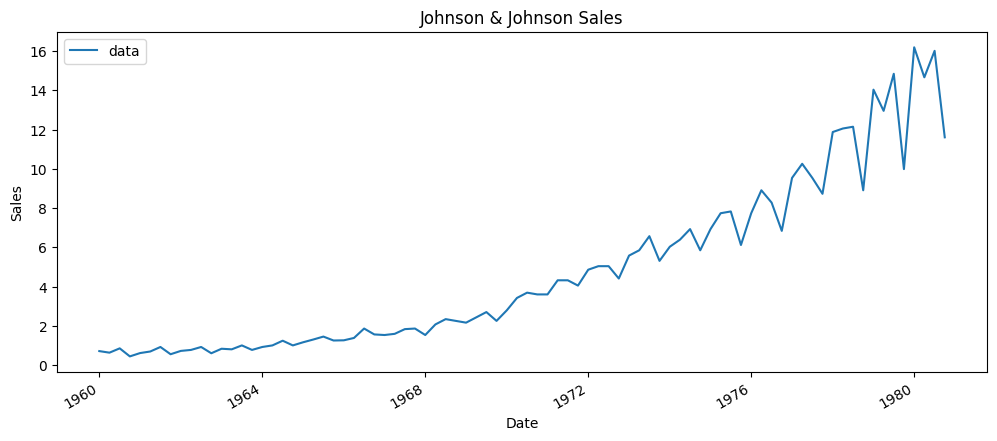

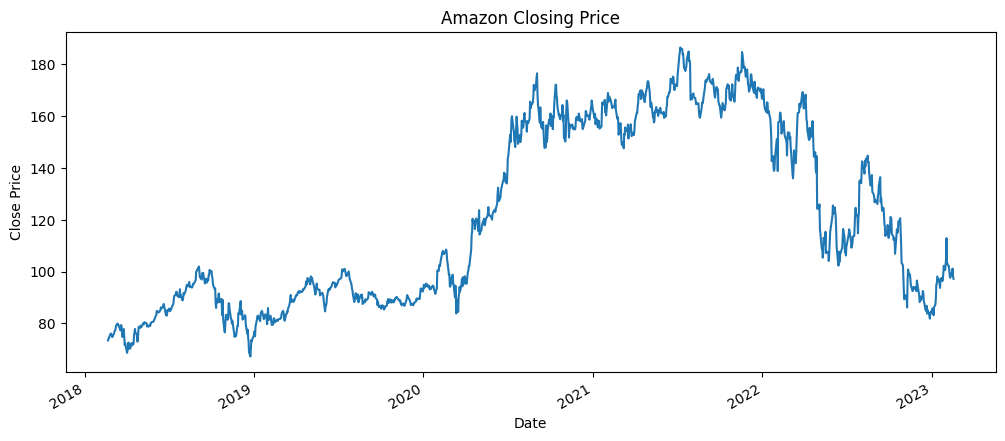

In [5]:
# Johnson & Johnson Sales data plot
jj_df.plot(title="Johnson & Johnson Sales", figsize=(12,5))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Amazon Share price data plot
amzn_df['Close'].plot(title="Amazon Closing Price", figsize=(12,5))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


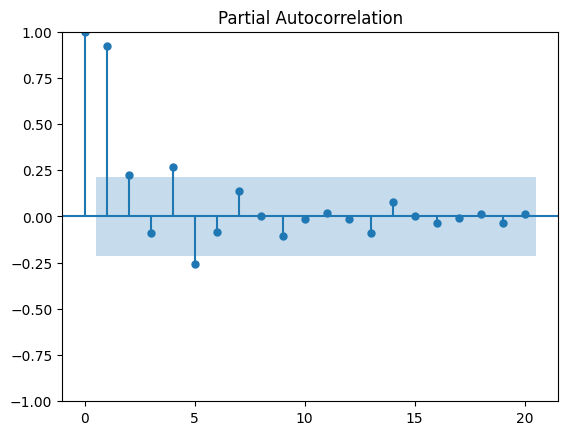

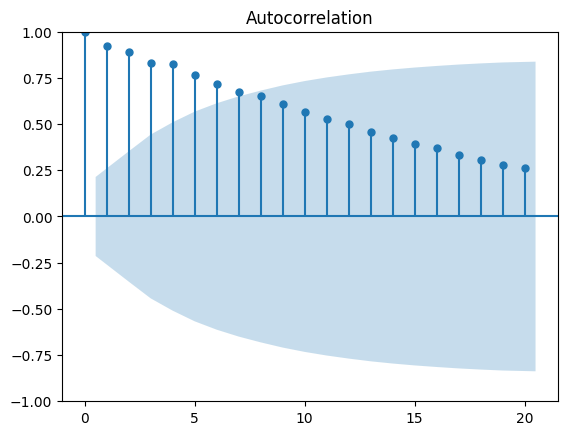

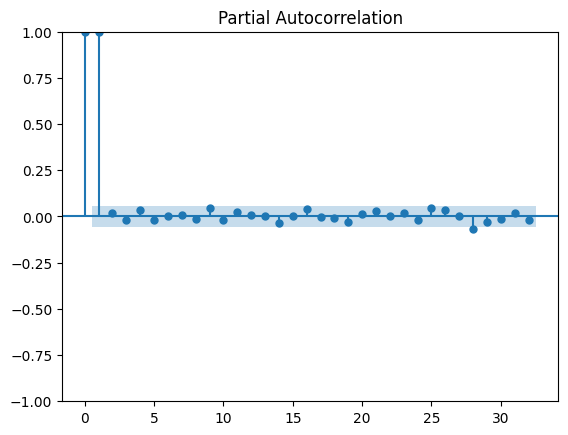

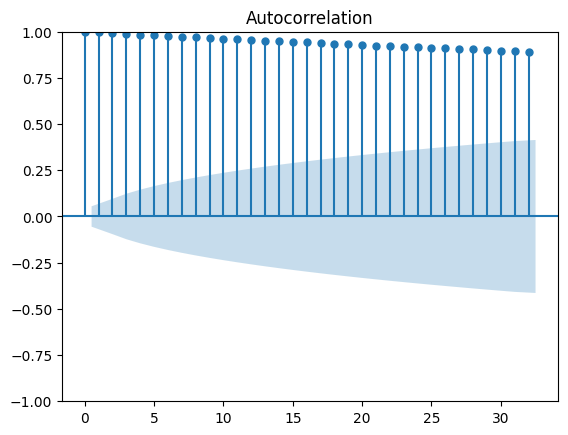

In [6]:
plot_pacf(jj_df['data']);
plot_acf(jj_df['data']);
plt.show()
plot_pacf(amzn_df['Close'])
plot_acf(amzn_df['Close'])
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test on Johnson & Johnson sales data
ad_fuller_result = adfuller(jj_df['data'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
 # Run ADF test on amazon
amzn_adf_result = adfuller(amzn_df['Close'])
print(f"ADF Statistic: {amzn_adf_result[0]}")
print(f"p-value: {amzn_adf_result[1]}")

ADF Statistic: 2.7420165734574744
p-value: 1.0
ADF Statistic: -1.6578089913331728
p-value: 0.45297105465166737


In [8]:
# Take the log
jj_df['data_log'] = np.log(jj_df['data'])

# Take the first difference of the log
jj_df['data_tr_1'] = jj_df['data_log'].diff()

# Display first 10 rows
print("🔹 Johnson & Johnson - Transformed Data (First 10 rows):")
print(jj_df.head(10))
# Take the log
amzn_df['Close_log'] = np.log(amzn_df['Close'])

# Take the first difference of the log
amzn_df['Close_tr_1'] = amzn_df['Close_log'].diff()

# Display first 10 rows
print("\n🔹 Amazon - Transformed Data (First 10 rows):")
print(amzn_df.head(10))

🔹 Johnson & Johnson - Transformed Data (First 10 rows):
            data  data_log  data_tr_1
date                                 
1960-01-01  0.71 -0.342490        NaN
1960-04-01  0.63 -0.462035  -0.119545
1960-07-02  0.85 -0.162519   0.299517
1960-10-01  0.44 -0.820981  -0.658462
1961-01-01  0.61 -0.494296   0.326684
1961-04-02  0.69 -0.371064   0.123233
1961-07-02  0.92 -0.083382   0.287682
1961-10-01  0.55 -0.597837  -0.514455
1962-01-01  0.72 -0.328504   0.269333
1962-04-02  0.77 -0.261365   0.067139

🔹 Amazon - Transformed Data (First 10 rows):
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2018-02-20  72.324501  74.438499  72.324501  73.417503  73.417503  129984000   
2018-02-21  74.250000  75.174500  73.945999  74.146004  74.146004  126088000   
2018-02-22  74.767998  75.126999  73.788002  74.266998  74.266998   97162000   
2018-02-23  74.766998  75.000000  74.32499

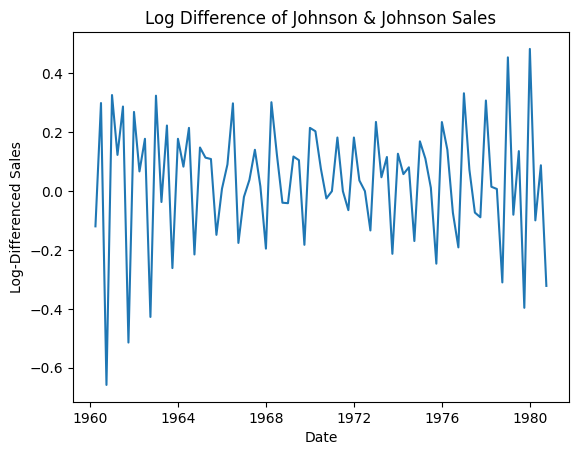

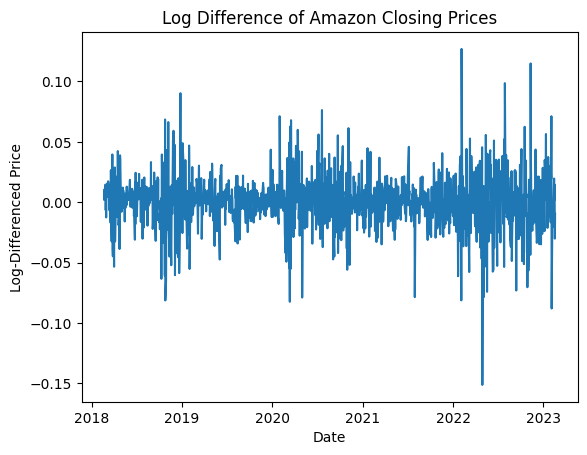

In [9]:
# Plot log difference of Johnson & Johnson sales
plt.plot(jj_df['data_tr_1'])
plt.title("Log Difference of Johnson & Johnson Sales")
plt.xlabel('Date')
plt.ylabel('Log-Differenced Sales')
plt.show()

# Plot log difference of Amazon closing prices
plt.plot(amzn_df['Close_tr_1'])
plt.title("Log Difference of Amazon Closing Prices")
plt.xlabel('Date')
plt.ylabel('Log-Differenced Price')
plt.show()


In [10]:
# Re-run ADF test on log-differenced JJ data
ad_fuller_result = adfuller(jj_df['data_tr_1'][1:])  # skip the first NaN
print("🔹 ADF Test - Johnson & Johnson (log difference):")
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

# Re-run ADF test on log-differenced Amazon data
ad_fuller_result = adfuller(amzn_df['Close_tr_1'][1:])  # skip the first NaN
print("\n🔹 ADF Test - Amazon (log difference):")
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

🔹 ADF Test - Johnson & Johnson (log difference):
ADF Statistic: -4.317043945811837
p-value: 0.00041497314044406584

🔹 ADF Test - Amazon (log difference):
ADF Statistic: -36.639832812749425
p-value: 0.0


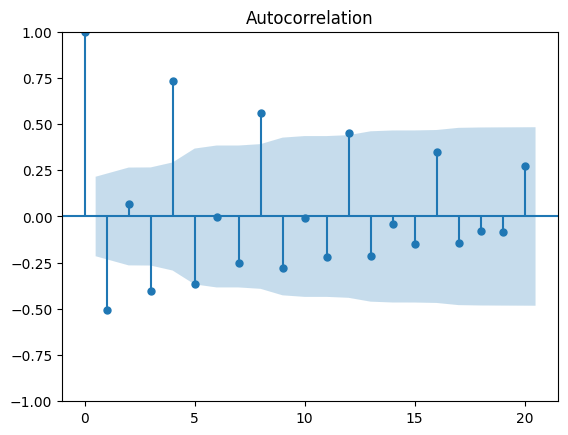

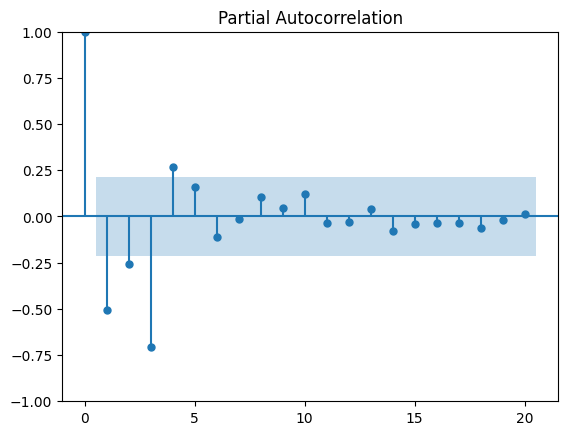

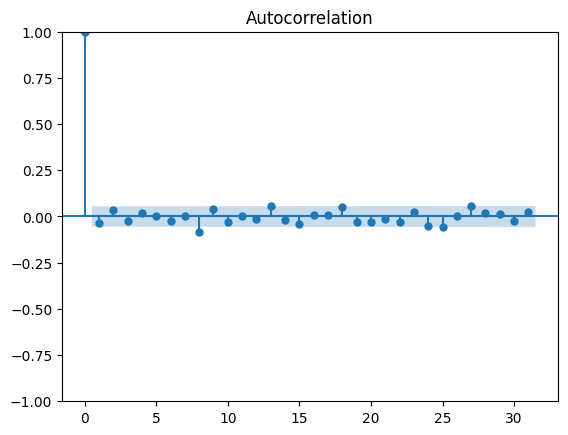

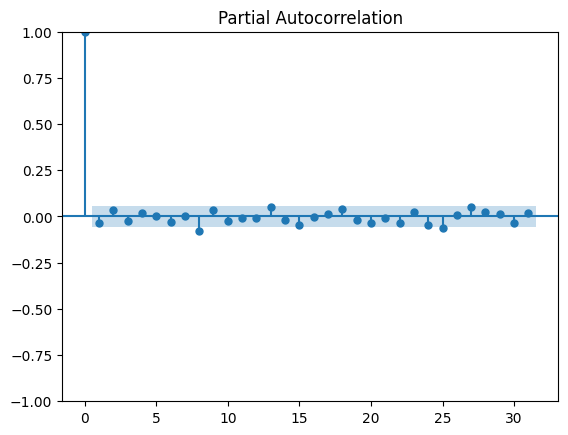

In [11]:
# Plot ACF and PACF for log-differenced Johnson & Johnson sales
plot_acf(jj_df['data_tr_1'][1:])
plot_pacf(jj_df['data_tr_1'][1:])
plt.show()

# Plot ACF and PACF for log-differenced Amazon closing price
plot_acf(amzn_df['Close_tr_1'][1:])
plot_pacf(amzn_df['Close_tr_1'][1:])
plt.show()

In [12]:
# Define ARIMA model (p=3, d=1, q=3) on original JJ data
model = ARIMA(jj_df['data'], order=(3,1,3))

# Fit the model
model_fit = model.fit()

# Print model summary
print("🔹 ARIMA Model Summary - Johnson & Johnson:")
print(model_fit.summary())


# Define ARIMA model (example: p=3, d=1, q=3) on original Amazon data
model_amzn = ARIMA(amzn_df['Close'], order=(3,1,3))

# Fit the model
model_amzn_fit = model_amzn.fit()

# Print model summary
print("\n🔹 ARIMA Model Summary - Amazon:")
print(model_amzn_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


🔹 ARIMA Model Summary - Johnson & Johnson:
                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   84
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 -76.286
Date:                Tue, 08 Apr 2025   AIC                            166.572
Time:                        21:52:38   BIC                            183.504
Sample:                             0   HQIC                           173.374
                                 - 84                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0311      0.036    -28.924      0.000      -1.101      -0.961
ar.L2         -1.0273      0.043    -23.892      0.000      -1.112      -0.943
ar.L3    

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u


🔹 ARIMA Model Summary - Amazon:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1259
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -3055.652
Date:                Tue, 08 Apr 2025   AIC                           6125.305
Time:                        21:52:40   BIC                           6161.266
Sample:                             0   HQIC                          6138.820
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7321      0.062    -11.836      0.000      -0.853      -0.611
ar.L2          0.6699      0.102      6.538      0.000       0.469       0.871
ar.L3          0.92

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [13]:
def optimize_ARIMA(endog, order_list):
    """
        Return dataframe with parameters and corresponding AIC

        order_list - list with (p, d, q) tuples
        endog - the observed variable, in this case data['data']
    """

    results = []

    for order in tqdm_notebook(order_list):
        try:
            #model = SARIMAX(endog, order=order, simple_differencing=False).fit(disp=False)
            model = ARIMA(endog, order=order)
            model_fit = model.fit()
        except:
            continue

        aic = model_fit.aic
        results.append([order, model_fit.aic])
        #print(order)
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [14]:
from itertools import product

# Set the range for p and q (0 to 7), and d is fixed at 1
ps = range(0, 8, 1)
qs = range(0, 8, 1)
d = 1

# Create combinations of p and q
parameters = product(ps, qs)  # e.g., (0,0), (0,1), ..., (7,7)
parameters_list = list(parameters)

# Insert d = 1 as the second element in each tuple
order_list = []
for each in parameters_list:
    each = list(each)
    each.insert(1, d)  # Now becomes (p, d, q)
    order_list.append(tuple(each))  # Convert back to tuple

# Check first 10 orders
order_list[:10]

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 1, 0),
 (1, 1, 1)]

In [23]:
# Call optimize_ARIMA with the correct DataFrame and column
result_df = optimize_ARIMA(jj_df['data'], order_list)

# Display the top results (lowest AIC first)
result_df.head()



  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
  2%|▏         | 1/64 [00:00<00:09,  6.45it/s]/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency inform

,"(p, d, q)",AIC
0,"(6, 1, 3)",115.297318
1,"(4, 1, 6)",115.859233
2,"(7, 1, 1)",116.050450
3,"(5, 1, 3)",116.536224
4,"(5, 1, 4)",117.242599


In [25]:

# Define and fit the best ARIMA model using the correct variable name
best_model = ARIMA(jj_df['data'], order=(6, 1, 3))

best_model_fit = best_model.fit()

# Optionally, view the model summary
print(best_model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   84
Model:                 ARIMA(6, 1, 3)   Log Likelihood                 -47.649
Date:                Tue, 08 Apr 2025   AIC                            115.297
Time:                        22:05:10   BIC                            139.486
Sample:                             0   HQIC                           125.015
                                 - 84                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4733      0.127    -11.640      0.000      -1.721      -1.225
ar.L2         -0.7728      0.148     -5.235      0.000      -1.062      -0.484
ar.L3          0.0382      0.063      0.610      0.5

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


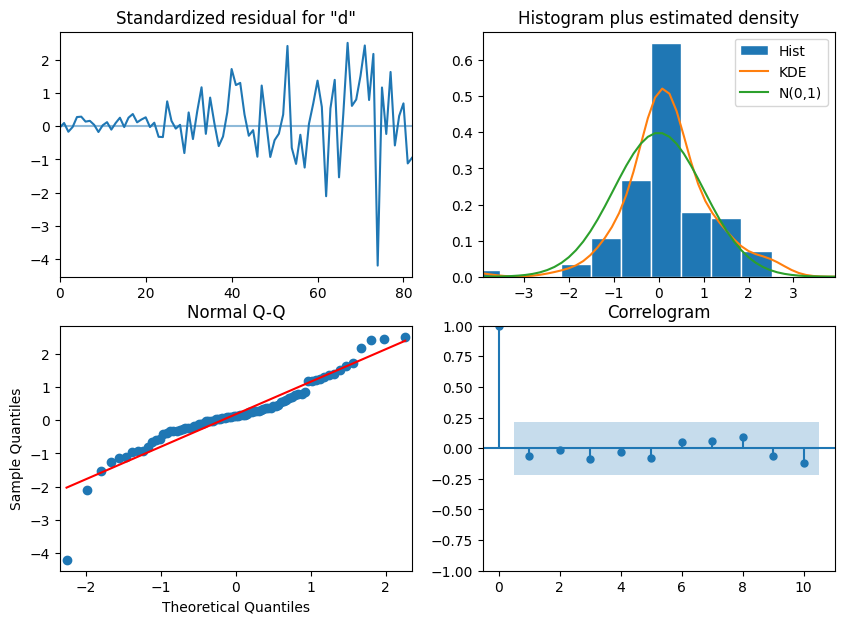

In [26]:
best_model_fit.plot_diagnostics(figsize=(10,7))
plt.show()

In [28]:
# Use the correct DataFrame
test_data = jj_df['data']

# Get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

# Get the predictions and residuals
predictions = best_model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions


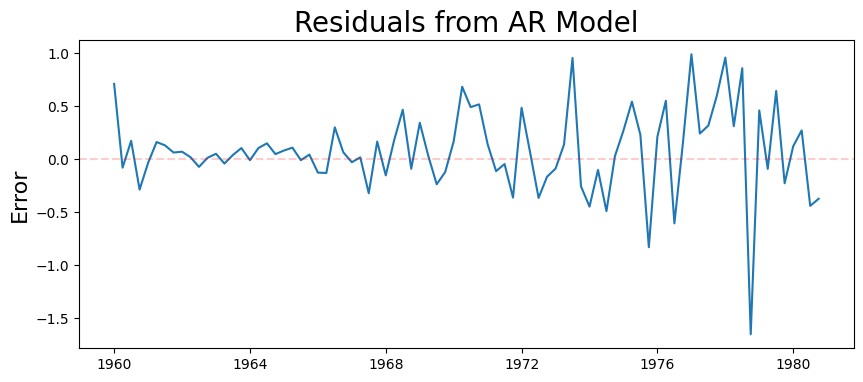

In [29]:
# plot the residuals

plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

In [30]:
# Assess the root mean square of the residuals

print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 0.3999081195935732


Text(0.5, 0, 'Month Number')

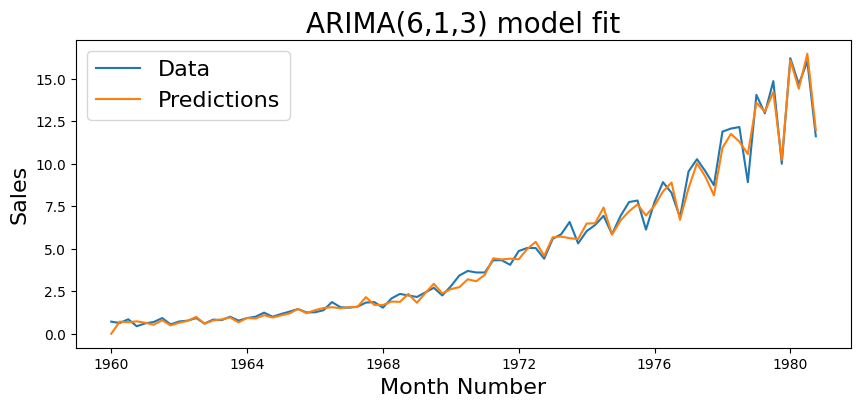

In [31]:
# Plot the model prediction against the data

plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('ARIMA(6,1,3) model fit', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Month Number', fontsize=16)

In [39]:
import numpy as np

def forecast_accuracy(forecast, actual):
    # Convert inputs to 1D NumPy arrays
    forecast = np.array(forecast).flatten()
    actual = np.array(actual).flatten()

    # Accuracy metrics
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))       # MAPE
    me = np.mean(forecast - actual)                                # ME
    mae = np.mean(np.abs(forecast - actual))                       # MAE
    mpe = np.mean((forecast - actual)/actual)                      # MPE
    rmse = np.mean((forecast - actual)**2)**0.5                    # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]                      # Correlation
    mins = np.amin(np.vstack([forecast, actual]), axis=0)
    maxs = np.amax(np.vstack([forecast, actual]), axis=0)
    minmax = 1 - np.mean(mins / maxs)                              # MinMax

    return {
        'mape': mape,
        'me': me,
        'mae': mae,
        'mpe': mpe,
        'rmse': rmse,
        'corr': corr,
        'minmax': minmax
    }


In [40]:
forecast_accuracy(predictions, test_data)

{'mape': np.float64(0.08945519428653988),
 'me': np.float64(-0.07906178477112123),
 'mae': np.float64(0.2789680779228482),
 'mpe': np.float64(-0.027613316081548874),
 'rmse': np.float64(0.3999081195935732),
 'corr': np.float64(0.9958097298551797),
 'minmax': np.float64(0.08437238270774561)}

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
<ipython-input-42-f042b1093d9c>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_forecast, freq='M')


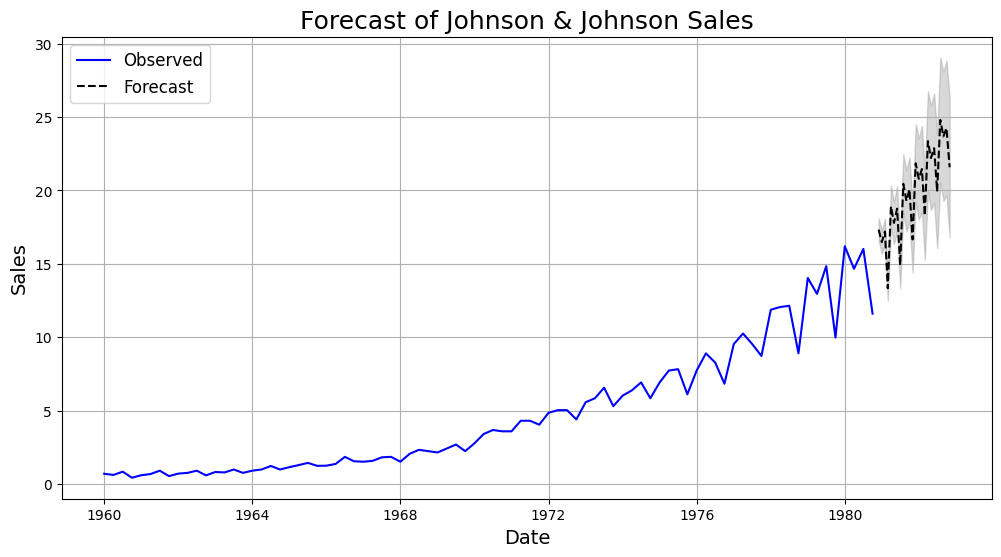

In [42]:

# Forecast 24 months into the future
n_forecast = 24

# Get forecast using get_forecast (recommended for plotting confidence intervals)
predict = best_model_fit.get_forecast(steps=n_forecast)

# Get forecasted values and confidence intervals
forecast_mean = predict.predicted_mean
forecast_ci = predict.conf_int()

# Create future index for plotting
last_date = jj_df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_forecast, freq='M')

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(jj_df.index, jj_df['data'], label='Observed', color='blue')
ax.plot(forecast_index, forecast_mean, label='Forecast', color='black', linestyle='--')
ax.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.3)
plt.ylabel('Sales', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('Forecast of Johnson & Johnson Sales', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [43]:
# use get_forecast() for this

# make the predictions for 24 steps ahead
predictions_int = best_model_fit.get_forecast(steps=26)
predictions_int.predicted_mean

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,predicted_mean
84,17.336626
85,16.481965
86,17.203514
87,13.344421
88,18.924689
89,17.790273
90,18.762096
91,14.903689
92,20.454214
93,19.287892


In [44]:
# get a better view
predictions_int.conf_int()

,lower data,upper data
84,16.565851,18.107401
85,15.687898,17.276032
86,16.341313,18.065716
87,12.481034,14.207809
88,17.509056,20.340322
89,16.346398,19.234148
90,17.212370,20.311821
91,13.320640,16.486737
92,18.460356,22.448071
93,17.212097,21.363686


In [45]:
# add the predicted mean column in

conf_df = pd.concat([predictions_int.predicted_mean, predictions_int.conf_int()], axis = 1)

conf_df.head()

,predicted_mean,lower data,upper data
84,17.336626,16.565851,18.107401
85,16.481965,15.687898,17.276032
86,17.203514,16.341313,18.065716
87,13.344421,12.481034,14.207809
88,18.924689,17.509056,20.340322


In [46]:
# change the name of the column heads

conf_df = conf_df.rename(columns={'predicted_mean': 'Predictions', 'lower data': 'Lower CI', 'upper data': 'Upper CI'})
conf_df.head()

,Predictions,Lower CI,Upper CI
84,17.336626,16.565851,18.107401
85,16.481965,15.687898,17.276032
86,17.203514,16.341313,18.065716
87,13.344421,12.481034,14.207809
88,18.924689,17.509056,20.340322


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-48-1fb4b1263886>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=jj_df.index[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='M')
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


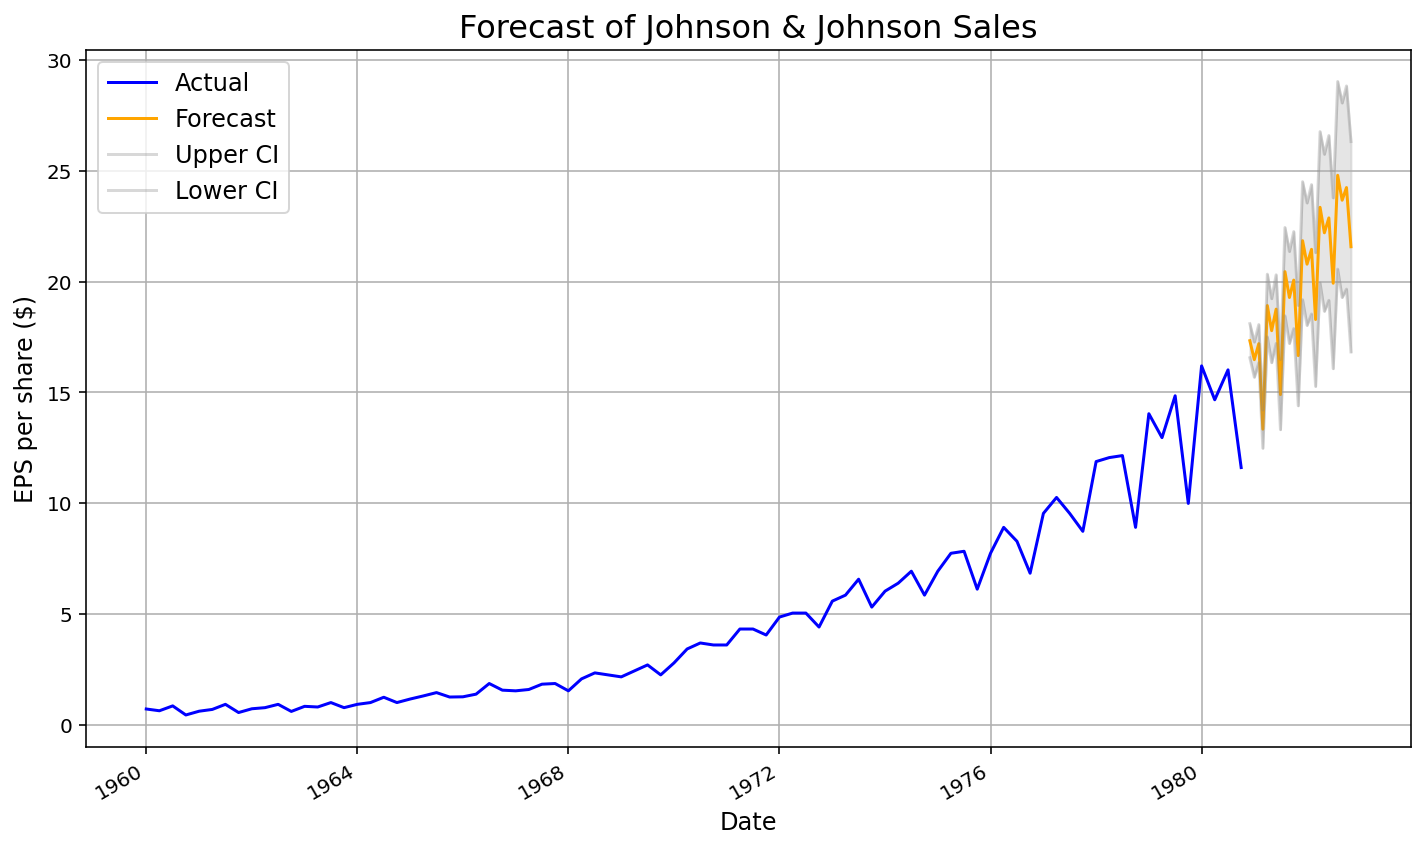

In [48]:
# Generate 24-month forecast
n_forecast = 24
forecast_obj = best_model_fit.get_forecast(steps=n_forecast)
forecast_mean = forecast_obj.predicted_mean
forecast_ci = forecast_obj.conf_int()

# Create a date range for the forecast
forecast_index = pd.date_range(start=jj_df.index[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='M')

# Create confidence interval DataFrame
conf_df = pd.DataFrame({
    'Predictions': forecast_mean.values,
    'Lower CI': forecast_ci.iloc[:, 0].values,
    'Upper CI': forecast_ci.iloc[:, 1].values
}, index=forecast_index)

# Plot model fit and forecast with confidence interval
fig, ax = plt.subplots(figsize=(10, 6), dpi=144)
ax.plot(jj_df['data'], 'b', label='Actual')

# Plot predictions and confidence intervals
conf_df['Predictions'].plot(ax=ax, color='orange', label='Forecast')
conf_df['Upper CI'].plot(ax=ax, color='grey', alpha=0.3, label='Upper CI')
conf_df['Lower CI'].plot(ax=ax, color='grey', alpha=0.3, label='Lower CI')

# Fill between upper and lower CI
ax.fill_between(conf_df.index, conf_df['Lower CI'], conf_df['Upper CI'], color='grey', alpha=0.2)

# Final plot settings
ax.set_title('Forecast of Johnson & Johnson Sales', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('EPS per share ($)', fontsize=12)
ax.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [50]:
# Fit ARIMA(3,1,3) model to Amazon closing prices
amzn_model = ARIMA(amzn_df['Close'], order=(3,1,3))

# Fit the model
amzn_model_fit = amzn_model.fit()

# View the summary
print(amzn_model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1259
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -3055.652
Date:                Tue, 08 Apr 2025   AIC                           6125.305
Time:                        22:32:02   BIC                           6161.266
Sample:                             0   HQIC                          6138.820
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7321      0.062    -11.836      0.000      -0.853      -0.611
ar.L2          0.6699      0.102      6.538      0.000       0.469       0.871
ar.L3          0.9210      0.060     15.446      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
# Call optimize_ARIMA for Amazon closing prices
amzn_result_df = optimize_ARIMA(amzn_df['Close'], order_list)

# Display the top models sorted by AIC
amzn_result_df.head()

  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

,"(p, d, q)",AIC
0,"(2, 1, 2)",6122.315476
1,"(3, 1, 2)",6124.039832
2,"(2, 1, 3)",6124.044468
3,"(3, 1, 3)",6125.304890
4,"(4, 1, 2)",6125.951759


In [54]:
# Fit ARIMA(2,1,2) model to Amazon data
amzn_best_model = ARIMA(amzn_df['Close'], order=(2,1,2))
amzn_best_model_fit = amzn_best_model.fit()

# Optional: print the summary
print(amzn_best_model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1259
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3056.158
Date:                Tue, 08 Apr 2025   AIC                           6122.315
Time:                        22:40:57   BIC                           6148.002
Sample:                             0   HQIC                          6131.969
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6946      0.015   -111.813      0.000      -1.724      -1.665
ar.L2         -0.9604      0.015    -64.728      0.000      -0.989      -0.931
ma.L1          1.6972      0.011    152.237      0.0

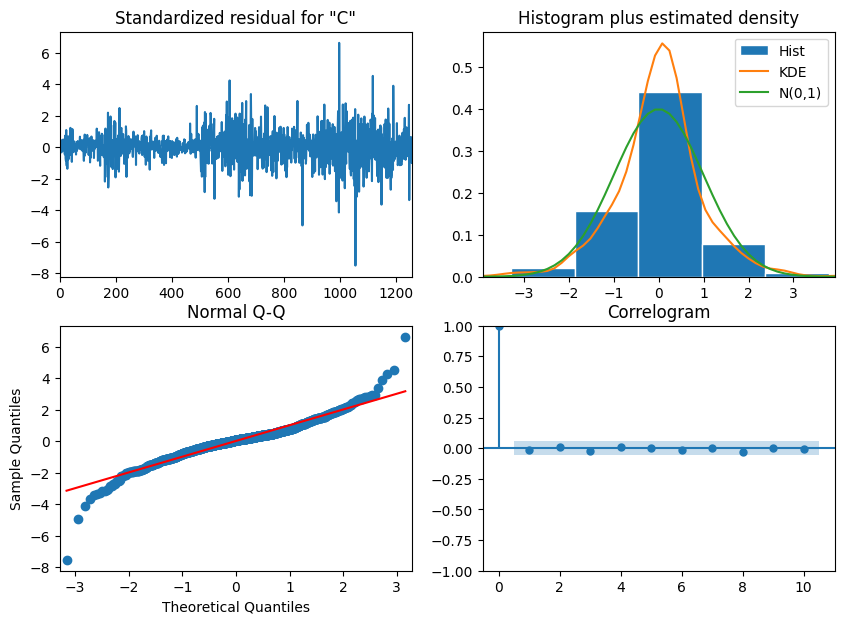

In [55]:
amzn_best_model_fit.plot_diagnostics(figsize=(10,7))
plt.show()

In [57]:
# Use the correct DataFrame
amzn_test_data = amzn_df['Close']

# Get prediction start and end dates
pred_start_date = amzn_test_data.index[0]
pred_end_date = amzn_test_data.index[-1]

# Get the predictions and residuals
amzn_predictions = amzn_best_model_fit.predict(start=pred_start_date, end=pred_end_date)
amzn_residuals = amzn_test_data - amzn_predictions

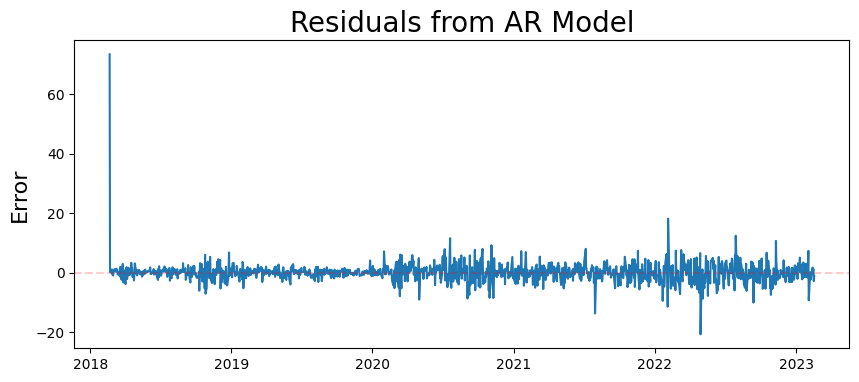

In [58]:
# plot the residuals

plt.figure(figsize=(10,4))
plt.plot(amzn_residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

In [59]:
# Assess the root mean square of the residuals

print('Root Mean Squared Error:', np.sqrt(np.mean(amzn_residuals**2)))

Root Mean Squared Error: 3.4377142885862564


Text(0.5, 0, 'Month Number')

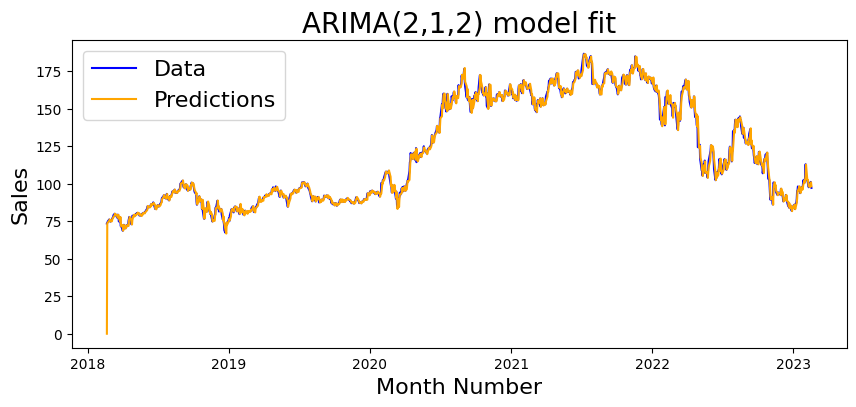

In [60]:
# Plot the model prediction against the data

plt.figure(figsize=(10,4))

plt.plot(amzn_test_data,color='blue')
plt.plot(amzn_predictions,color='orange')

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('ARIMA(2,1,2) model fit', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Month Number', fontsize=16)

In [61]:
forecast_accuracy(amzn_predictions, amzn_test_data)

{'mape': np.float64(0.016931563361968164),
 'me': np.float64(-0.0770783695805422),
 'mae': np.float64(1.9760998010140356),
 'mpe': np.float64(-0.0007597542001993602),
 'rmse': np.float64(3.4377142885862564),
 'corr': np.float64(0.9951401775651083),
 'minmax': np.float64(0.016666924422048535)}

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-63-bdb5aca40c83>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=last_idx + pd.offsets.MonthEnd(1), periods=n_forecast, freq='M')
<ipython-input-63-bdb5aca40c83>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(forecast_index, predicted_mean[-n_forecast:], 'k--', color

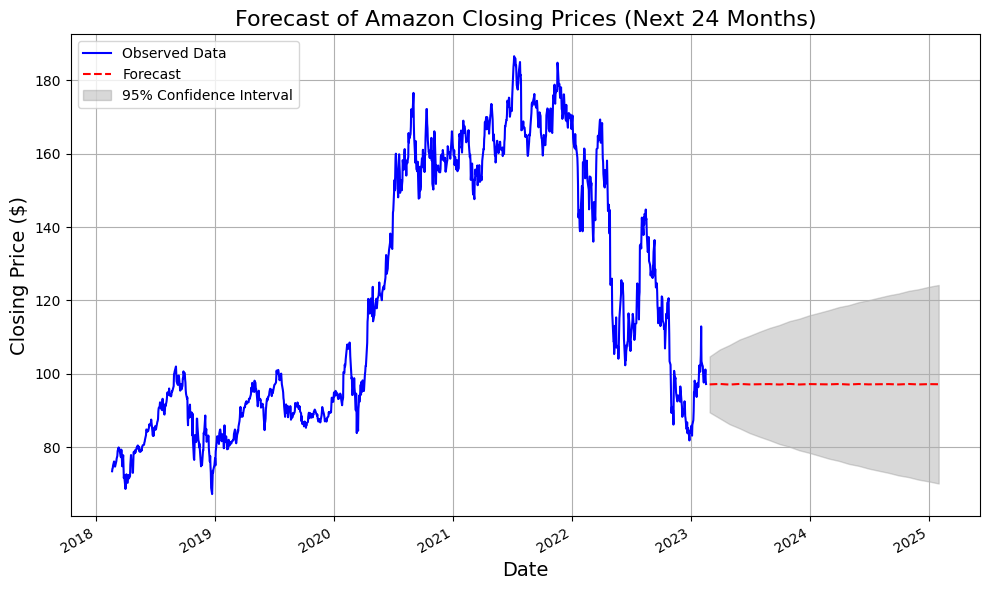

In [63]:
n_forecast = 24  # 24 months

# Generate prediction using your fitted ARIMA model
amzn_predict = amzn_best_model_fit.get_prediction(end=amzn_best_model_fit.nobs + n_forecast)
predicted_mean = amzn_predict.predicted_mean
forecast_conf_int = amzn_predict.conf_int()

# Create future index
last_idx = amzn_df.index[-1]
forecast_index = pd.date_range(start=last_idx + pd.offsets.MonthEnd(1), periods=n_forecast, freq='M')

# Extract confidence intervals
lower_bound = forecast_conf_int.iloc[:, 0]
upper_bound = forecast_conf_int.iloc[:, 1]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
amzn_df['Close'].plot(ax=ax, label='Observed Data', color='blue')

# Plot forecast
ax.plot(forecast_index, predicted_mean[-n_forecast:], 'k--', color='red', label='Forecast')

# Plot confidence intervals
ax.fill_between(forecast_index,
                lower_bound[-n_forecast:], upper_bound[-n_forecast:],
                color='grey', alpha=0.3, label='95% Confidence Interval')

# Formatting
plt.ylabel('Closing Price ($)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('Forecast of Amazon Closing Prices (Next 24 Months)', fontsize=16)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


In [64]:
# use get_forecast() for this

# make the predictions for 24 steps ahead
amzn_predictions_int = amzn_best_model_fit.get_forecast(steps=24)
amzn_predictions_int.predicted_mean

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
1259,97.138877
1260,97.100049
1261,97.224545
1262,97.050869
1263,97.225609
1264,97.096299
1265,97.147604
1266,97.184852
1267,97.072460
1268,97.227143


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
<ipython-input-66-cbb68e94afaf>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=amzn_df.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')


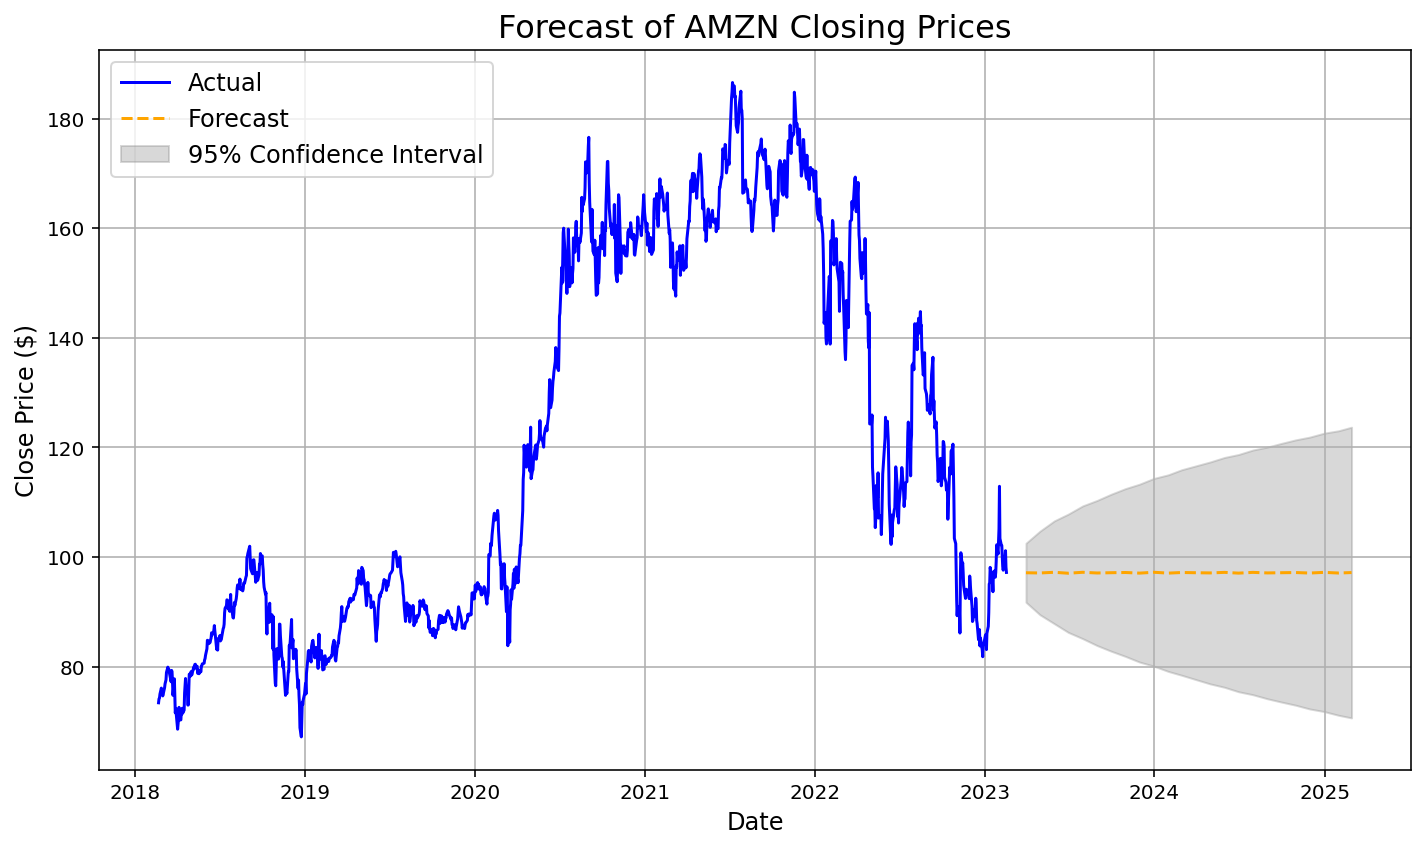

In [66]:
# Step 1: Get forecast results again if needed
amzn_forecast = amzn_best_model_fit.get_forecast(steps=24)
predicted_mean = amzn_forecast.predicted_mean
forecast_conf_int = amzn_forecast.conf_int()

# Step 2: Build forecast index
forecast_index = pd.date_range(start=amzn_df.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')

# Step 3: Build forecast DataFrame for plotting
amzn_conf_df = pd.DataFrame({
    'predicted_mean': predicted_mean.values,
    'lower': forecast_conf_int.iloc[:, 0].values,
    'upper': forecast_conf_int.iloc[:, 1].values
}, index=forecast_index)

# Step 4: Plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=144)

# Plot actual data
ax.plot(amzn_df['Close'], color='blue', label='Actual')

# Plot forecast
ax.plot(amzn_conf_df.index, amzn_conf_df['predicted_mean'], color='orange', linestyle='--', label='Forecast')

# Plot confidence intervals
ax.fill_between(amzn_conf_df.index,
                amzn_conf_df['lower'],
                amzn_conf_df['upper'],
                color='grey', alpha=0.3, label='95% Confidence Interval')

# Final plot settings
ax.set_title('Forecast of AMZN Closing Prices', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Close Price ($)', fontsize=12)
ax.legend(loc='upper left', fontsize=12)
ax.grid(True)
plt.tight_layout()
plt.show()
